In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [7]:
#using pandas to read database
data = pd.read_csv('mnist_test.csv')

In [8]:
# view the column heads
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# extracting data from the database and viewing them up close
a = data.iloc[3,1:].values

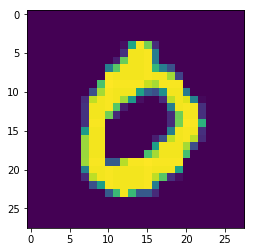

In [12]:
# reshaping the data into 28x28
a = a.reshape(28,28).astype('uint8')
plt.imshow(a)

In [13]:
# preparing the data 
# seperating labels and data values
df_x = data.iloc[:,1:]
df_y = data.iloc[:,0]

In [17]:
# creating test and train sizes/batches 
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 4)

In [19]:
#check data
y_train.head()

4983    3
6789    1
2221    1
6043    5
1564    7
Name: label, dtype: int64

In [20]:
# cell rf classifier
rf = RandomForestClassifier(n_estimators = 100)

In [21]:
# fit the model 
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
# prediction on the test data
pred = rf.predict(x_test)
pred

array([1, 3, 7, ..., 0, 1, 0], dtype=int64)

In [26]:
# check prediction accuracy
s = y_test.values

# calculation number of correctly predicted values
count = 0
for i in range(len(pred)):
    if pred [i] == s[i]:
        count = count + 1
        
count

1893

In [27]:
# total values for preadiction
len(pred)

2000

In [28]:
# accuracy 
1893/2000

0.9465